In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

%matplotlib inline

## Weekly incidence curve with typical intensity and thresholds

In this example, we show the current year incidence up to given week.<br>
Along with the current incidence, we present the following intensity thresholds:<br>

* Low activity threshold: estimated epidemic threshold based on historical levels. Minimum: incidence equivalent to 5 cases.

* High activity threshold: incidence considered high based on historical levels. Minimum: incidence equivalent to 10 cases.

* Very high activity threshold: incidence considered very high based on historical levels. Minimum: incidence equivalent to 20 cases.

In [168]:
dfincidence = pd.read_csv('../data/current_estimated_values.csv')
dftypical = pd.read_csv('../data/mem-typical.csv')
dfthresholds = pd.read_csv('../data/mem-report.csv')
dfpop = pd.read_csv('../data/PROJECOES_2013_POPULACAO-simples_agebracket.csv')
level_dict = {'L0': 'Baixa', 'L1': 'Epidêmica',
              'L2': 'Alta', 'L3': 'Muito alta'}

In [169]:
dfpop.head(10)

,Código,Sigla,UF,Região,Região oficial,Ano,Total,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,40-49 anos,50-59 anos,60+ anos
0,11,RO,Rondônia,AfAmN,Norte,2000,1401535,160573,164716,319949,260368,209975,138394,77182,70378
1,11,RO,Rondônia,AfAmN,Norte,2001,1431048,162084,164597,322599,267437,214927,145288,80913,73203
2,11,RO,Rondônia,AfAmN,Norte,2002,1459811,163196,164136,324377,275117,219419,152376,85030,76160
3,11,RO,Rondônia,AfAmN,Norte,2003,1487850,164048,163286,325479,283067,223653,159554,89514,79249
4,11,RO,Rondônia,AfAmN,Norte,2004,1515151,164765,161989,326209,290774,227933,166674,94329,82478
5,11,RO,Rondônia,AfAmN,Norte,2005,1541715,165556,160112,326755,297881,232474,173637,99443,85857
6,11,RO,Rondônia,AfAmN,Norte,2006,1567546,162658,161517,327033,304384,237273,180430,104845,89406
7,11,RO,Rondônia,AfAmN,Norte,2007,1592640,159847,162536,327025,310224,242316,187053,110499,93140
8,11,RO,Rondônia,AfAmN,Norte,2008,1616992,157101,163301,326599,315334,247762,193399,116393,97103
9,11,RO,Rondônia,AfAmN,Norte,2009,1640607,154445,163927,325513,319694,253813,199345,122513,101357


In [170]:
dfincidence.columns

Index(['DT_NOTIFIC_epiyearweek', 'UF', 'epiyear', 'epiweek', 'SRAG',
       '0-4 anos', '5-9 anos', '10-19 anos', '20-29 anos', '30-39 anos',
       '40-49 anos', '50-59 anos', '60+ anos', 'Situation', 'mean', '50%',
       '2.5%', '97.5%', 'L0', 'L1', 'L2', 'L3', 'Run date'],
      dtype='object')

- UF: locality code, matching dfpop['Código'] (includes UFs, Regions and Country)
- mean: estimated mean incidence
- 50%: estimated median
- 2.5%: estimation lower 95% confidence interval
- 97.5%: estimation upper 95% confidence interval
- L0: probability of being below epi. threshold (low level)
- L1: probability of being above epi. threshold and below high activity (epidemic level)
- L2: prob. of being above high activity and below very high (high level)
- L3: prob. of being above very high activity threshold (very high level)
- Situation:
    - stable: might suffer minor changes in the future. Reliable as is;
    - estimated: data estimated based on opportunity (i.e. notification delay) profile. Reliable within confidence interval;
    - unknown: might suffer significant changes in the coming weeks. This is the case for locations where estimation is not possible and data is still "fresh". Unreliable.

In [171]:
dfincidence.head(10)

,DT_NOTIFIC_epiyearweek,UF,epiyear,epiweek,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,...,Situation,mean,50%,2.5%,97.5%,L0,L1,L2,L3,Run date
0,2009W01,11,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
1,2009W01,12,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
2,2009W01,13,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
3,2009W01,14,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
4,2009W01,15,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
5,2009W01,16,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
6,2009W01,17,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
7,2009W01,21,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
8,2009W01,22,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19
9,2009W01,23,2009,1,0,0,0,0,0,0,...,stable,0,0,0,0,1,0,0,0,2016-10-19


In [172]:
dftypical.head(10)

,UF,População,epiweek,corredor baixo,corredor mediano,corredor alto,Unidade da Federação
0,11,1787279,1,0.000000,0.000000,0.000000,Rondônia
1,11,1787279,2,0.000000,0.000000,0.000000,Rondônia
2,11,1787279,3,0.000000,0.339327,0.339327,Rondônia
3,11,1787279,4,0.000000,0.056555,0.056555,Rondônia
4,11,1787279,5,0.000000,0.113109,0.113109,Rondônia
5,11,1787279,6,0.000000,0.000000,0.000000,Rondônia
6,11,1787279,7,0.000000,0.226218,0.226218,Rondônia
7,11,1787279,8,0.058217,0.058947,0.059686,Rondônia
8,11,1787279,9,0.000000,0.000000,0.000000,Rondônia
9,11,1787279,10,0.033013,0.099082,0.297373,Rondônia


In [173]:
dfthresholds.tail(10)

,UF,População,Média geométrica do pico de infecção das temporadas regulares,limiar pré-epidêmico,intensidade alta,intensidade muito alta,se típica do início do surto,IC da se típica do início do surto,duração típica do surto,IC da duração típica do surto,Unidade da Federação
22,43,11286500,0.784539,0.315823,1.116211,1.898509,20,[18.0-22.0],14,[12.0-16.0],Rio Grande do Sul
23,50,2682386,0.408308,0.557307,0.991530,1.479489,20,[18.0-23.0],11,[5.0-23.0],Mato Grosso do Sul
24,51,3305531,0.159167,0.151262,0.302523,0.605047,NaN,NaN,NaN,NaN,Mato Grosso
25,52,6695855,0.287897,0.197337,0.275105,0.359598,21,[12.0-36.0],7,[4.0-11.0],Goiás
26,53,2977216,0.401461,0.244760,0.445889,0.671769,15,[9.0-24.0],11,[9.0-13.0],Distrito Federal
27,AfAmN,16174881,0.200424,0.087873,0.208579,0.323719,13,[10.0-17.0],11,[9.0-14.0],Região 1
28,AsBSh,67360182,0.108547,0.081896,0.146960,0.195710,15,[10.0-21.0],12,[9.0-16.0],Região 2
29,Aw,27359337,0.246330,0.096001,0.226716,0.312417,16,[11.0-22.0],12,[10.0-16.0],Região 3
30,BR,206081432,0.422669,0.174155,0.488576,0.697003,16,[11.0-23.0],12,[10.0-14.0],Brasil
31,Cf,95187032,0.585316,0.286125,0.885425,1.309426,16,[11.0-23.0],12,[10.0-14.0],Região 4


Entries with dfthresholds['se típica do inicio do surto'] = NaN have activity too low for proper epidemic threshold definition

In [174]:
df = pd.merge(dfincidence, dfthresholds[['UF','Unidade da Federação']], on='UF')
df.head(10)

,DT_NOTIFIC_epiyearweek,UF,epiyear,epiweek,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,...,mean,50%,2.5%,97.5%,L0,L1,L2,L3,Run date,Unidade da Federação
0,2009W01,11,2009,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
1,2009W02,11,2009,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
2,2009W03,11,2009,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
3,2009W04,11,2009,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
4,2009W05,11,2009,5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
5,2009W06,11,2009,6,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
6,2009W07,11,2009,7,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
7,2009W08,11,2009,8,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
8,2009W09,11,2009,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia
9,2009W10,11,2009,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2016-10-19,Rondônia


In [218]:
def plot_timeseries(df, dfthres, dftyp):
    
    # Set font properties
    fontproplgd = fm.FontProperties('Oswald')
    fontproplgd.set_size(28)
    fontproplbl = fm.FontProperties('Oswald')
    fontproplbl.set_size(42)
    fontpropticks = fm.FontProperties('Oswald')
    fontpropticks.set_size(24)

    # Set figure size
    fig, ax = plt.subplots(1, 1, figsize = [20, 20])

    # Set ymax at least = 1:
    max_typ = dftyp['corredor alto'].max()
    max_thres = dfthres['intensidade muito alta'].max()
    max_ts = df[['SRAG', '50%']].max().max()
    maxval1 = max([max_typ, max_thres, max_ts, 1])
    ax.set_ylim([0,maxval1])

    # Plot lines and regions:
    ax.fill_between(dftyp['epiweek'], 0, dftyp['corredor baixo'], color='green', alpha=0.5)
    ax.fill_between(dftyp['epiweek'], dftyp['corredor baixo'], dftyp['corredor mediano'], color='yellow', alpha=0.5)
    ax.fill_between(dftyp['epiweek'], dftyp['corredor mediano'], dftyp['corredor alto'], color='orange', alpha=0.5)
    try:
        df.plot(ax=ax, x='epiweek', y='SRAG', color='k', lw=3, label='Casos notificados')
    except:
        pass
    try:
        minweek = int(df.loc[df['Situation']=='estimated','epiweek'].min())
        df_est = df[df['epiweek']>=minweek]
        df_est.plot(ax=ax, x='epiweek', y='50%', color='r', lw=3, label='Casos estimados')
        df_est.plot(ax=ax, x='epiweek', y='2.5%', color='r', lw=3, style='--', label='Intervalo de confiança')
        df_est.plot(ax=ax, x='epiweek', y='97.5%', color='r', lw=3, style='--', label='')
    except:
        pass
    try:
        minweek = int(df.loc[df['Situation']=='unknown','epiweek'].min())
        df_est = df[df['epiweek']>=minweek]
        df_est.plot(ax=ax, x='epiweek', y='97.5%', color='silver', lw=3, style='--', label='Dados potencialmente\nincompletos')
    except:
        pass

    plt.axhline(y=np.float(dfthres['limiar pré-epidêmico']), label='limiar pré-epidêmico', ls='--', lw=3,
                color='yellow')
    plt.axhline(y=np.float(dfthres['intensidade alta']), label='intensidade alta', ls='--', lw=3,
                color='orange')
    plt.axhline(y=np.float(dfthres['intensidade muito alta']), label='intensidade muito alta', ls='--', lw=3,
                color='darkred')
    dftyp.plot(ax=ax, x='epiweek', y='corredor alto', legend=False, alpha=0)

    # Grab ylim in order to set the range for the red zone:
    miny, maxy = ax.get_ylim()
    del(ax.lines[-1])
    ax.fill_between(dftyp['epiweek'], dftyp['corredor alto'], maxy, color='red', alpha=0.5)
    ax.set_ylim([miny, maxy])

    # Draw vertical line indicating user selected week:
    plt.axvline(axes=ax, x=week, color='silver', lw=8, alpha=0.5)

    # Use defined font properties for axis tick labels
    for label in ax.get_xticklabels() :
        label.set_fontproperties(fontpropticks)    
    for label in ax.get_yticklabels() :
        label.set_fontproperties(fontpropticks)

    ax.set_title(uf, fontproperties=fontproplbl)
    ax.set_xlabel('SE', fontproperties=fontproplbl)
    ax.set_ylabel('Incidência (por 100mil habitantes)', fontproperties=fontproplbl)
    xticks = np.arange(4,53,4)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(prop=fontproplgd, loc='center left', bbox_to_anchor=(1,0.5))

    if (df.loc[df['epiweek'] == week, 'Situation'].values[0] == 'estimated'):
        activity_levels = df.loc[df.epiweek == week, level_dict.keys()]
        ax.text(1.01, 0.99, s=str('Probabilidade do nível de atividade:\n'+
                                  'Baixa: %s\n'+
                                  'Epidêmica: %s\n'+
                                  'Alta: %s\n'+
                                  'Muito alta: %s') % 
                ('{:.1f}%'.format(100*float(activity_levels['L0'])),
                 '{:.1f}%'.format(100*float(activity_levels['L1'])), 
                 '{:.1f}%'.format(100*float(activity_levels['L2'])),
                 '{:.1f}%'.format(100*float(activity_levels['L3']))),
                fontproperties=fontproplgd, ha='left', va='top', transform=ax.transAxes)
    elif (df.loc[df.epiweek == week, 'Situation'].values[0] == 'stable'):
        df_level = df.loc[(df['epiweek'] == week), level_cols].unstack().copy()
        df_level.sort_values(ascending=False, inplace=True)
        activity_level = df_level.index[0][0]
        ax.text(1.01, 0.99, s=str('Nível de atividade:\n'+
                                  '%s\n') % level_dict[activity_level],
                fontproperties=fontproplgd, ha='left', va='top', transform=ax.transAxes)

    return

## State example

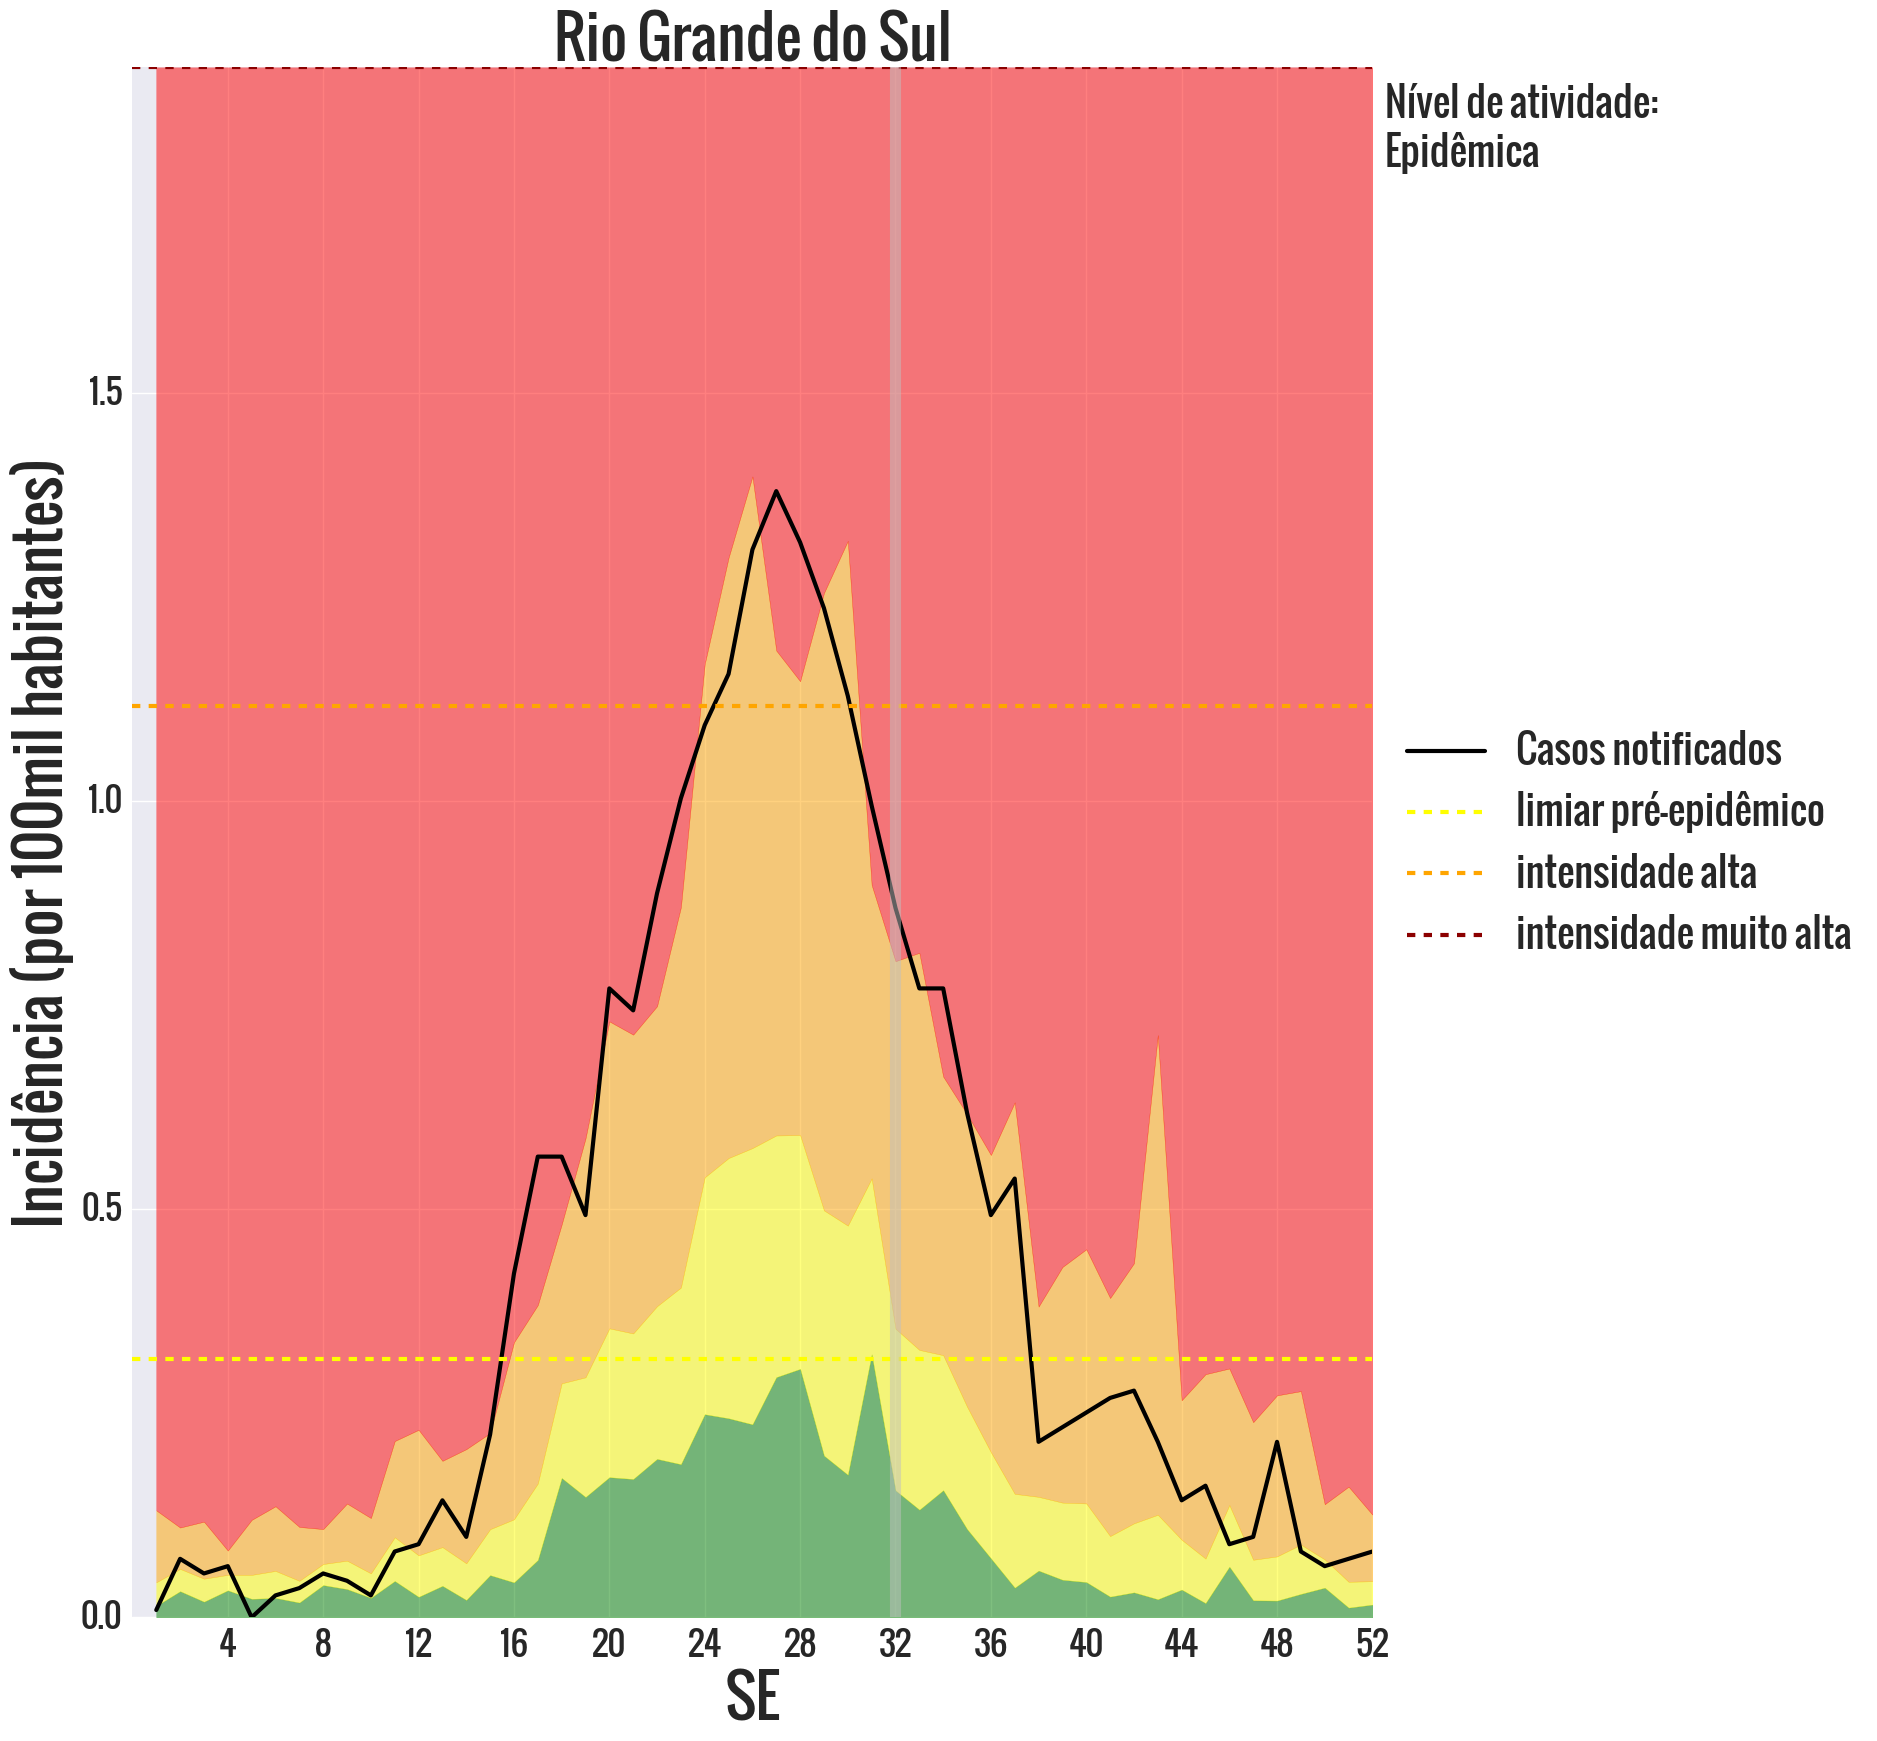

In [219]:
season = 2013
uf = 'Rio Grande do Sul'
week = 32
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dfthres=dfthres_tmp, dftyp=dftyp_tmp)

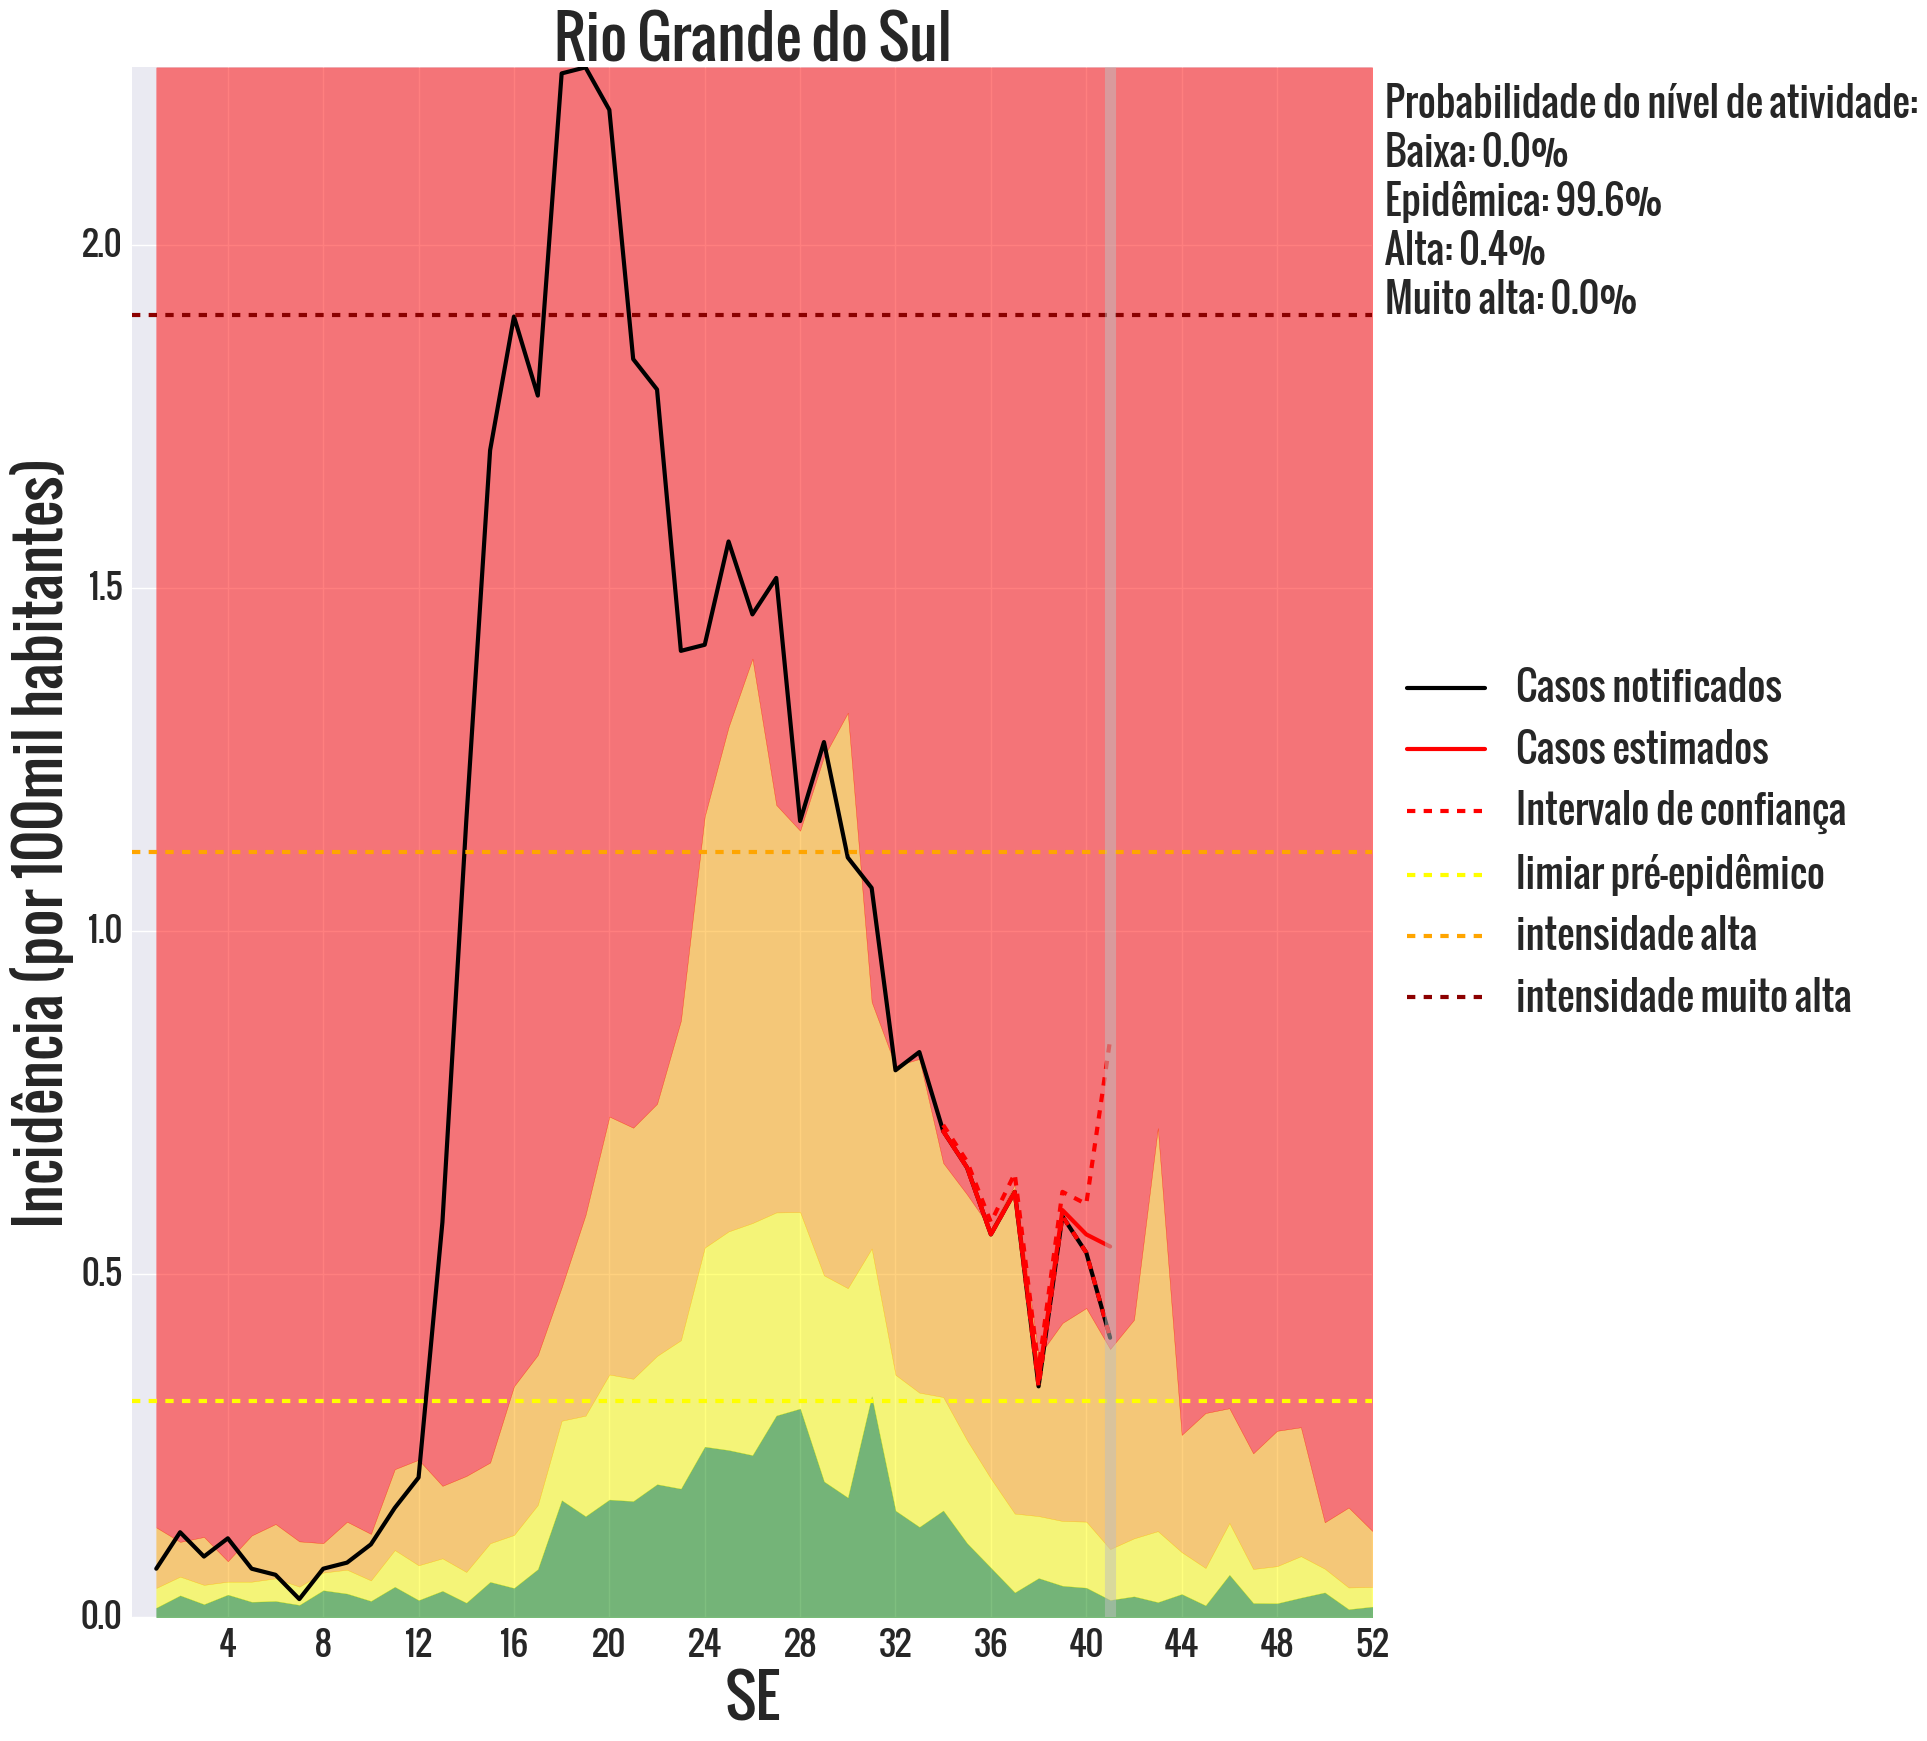

In [220]:
season = 2016
uf = 'Rio Grande do Sul'
week = 41
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dftyp=dftyp_tmp, dfthres=dfthres_tmp)

## Regional example

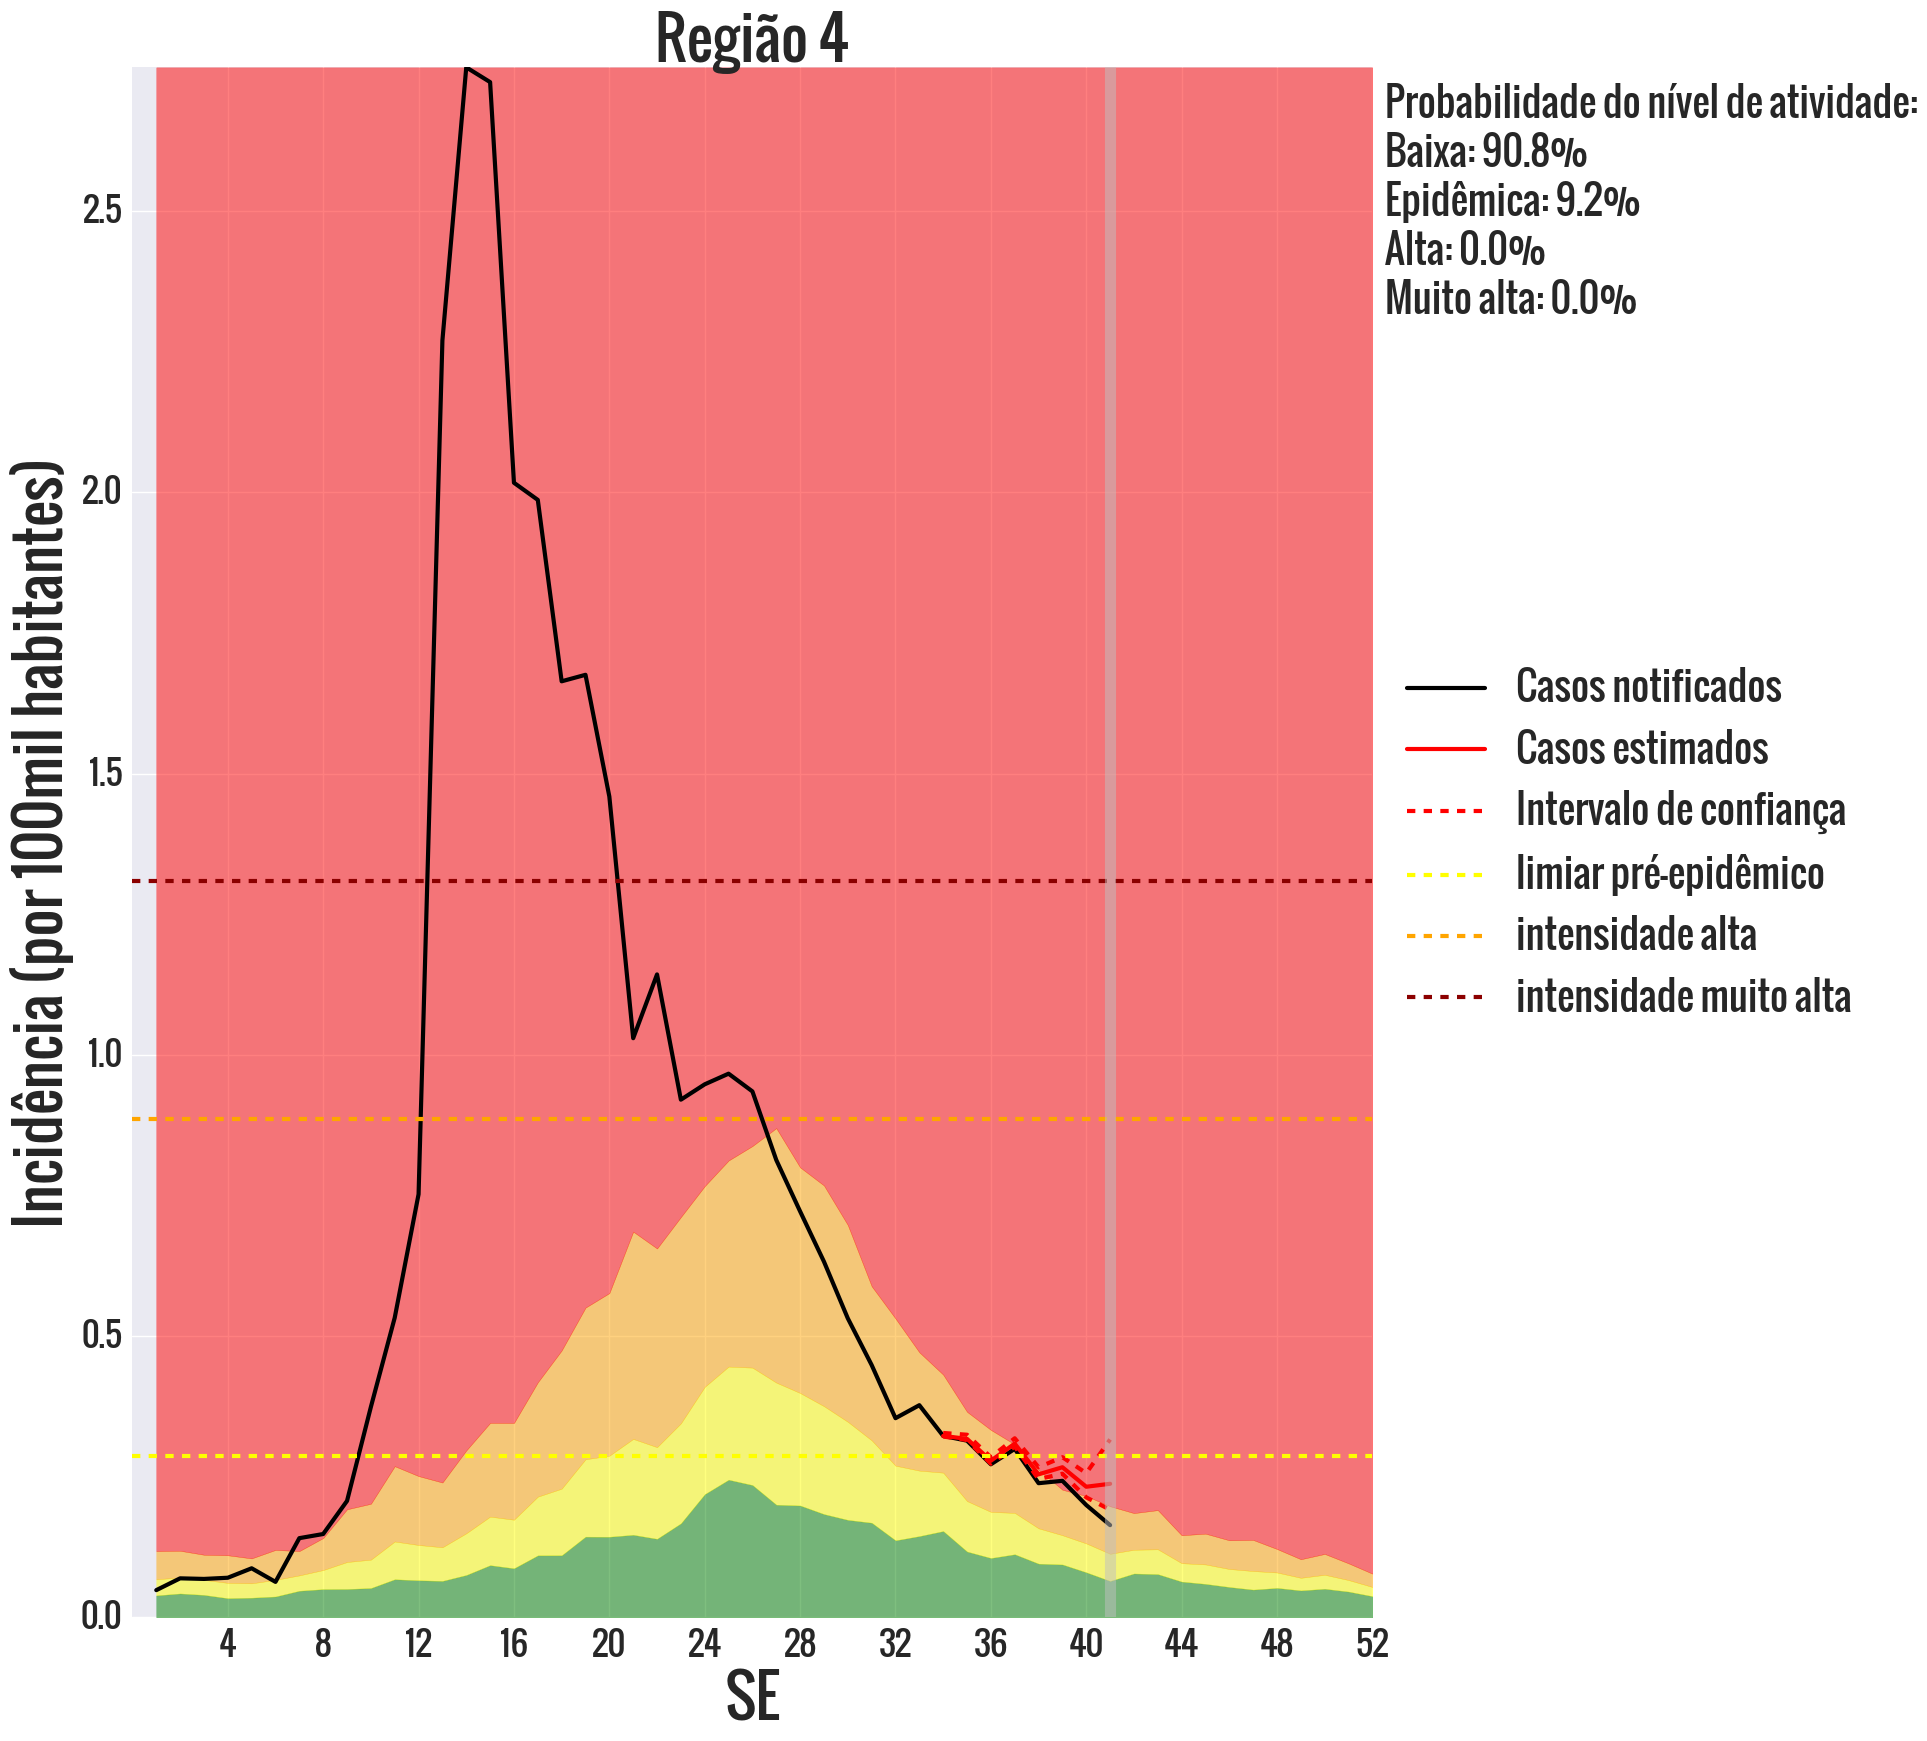

In [226]:
season = 2016
uf = 'Região 4'
week = 41
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dfthres=dfthres_tmp, dftyp=dftyp_tmp)

##  Example with state where estimates are not available:

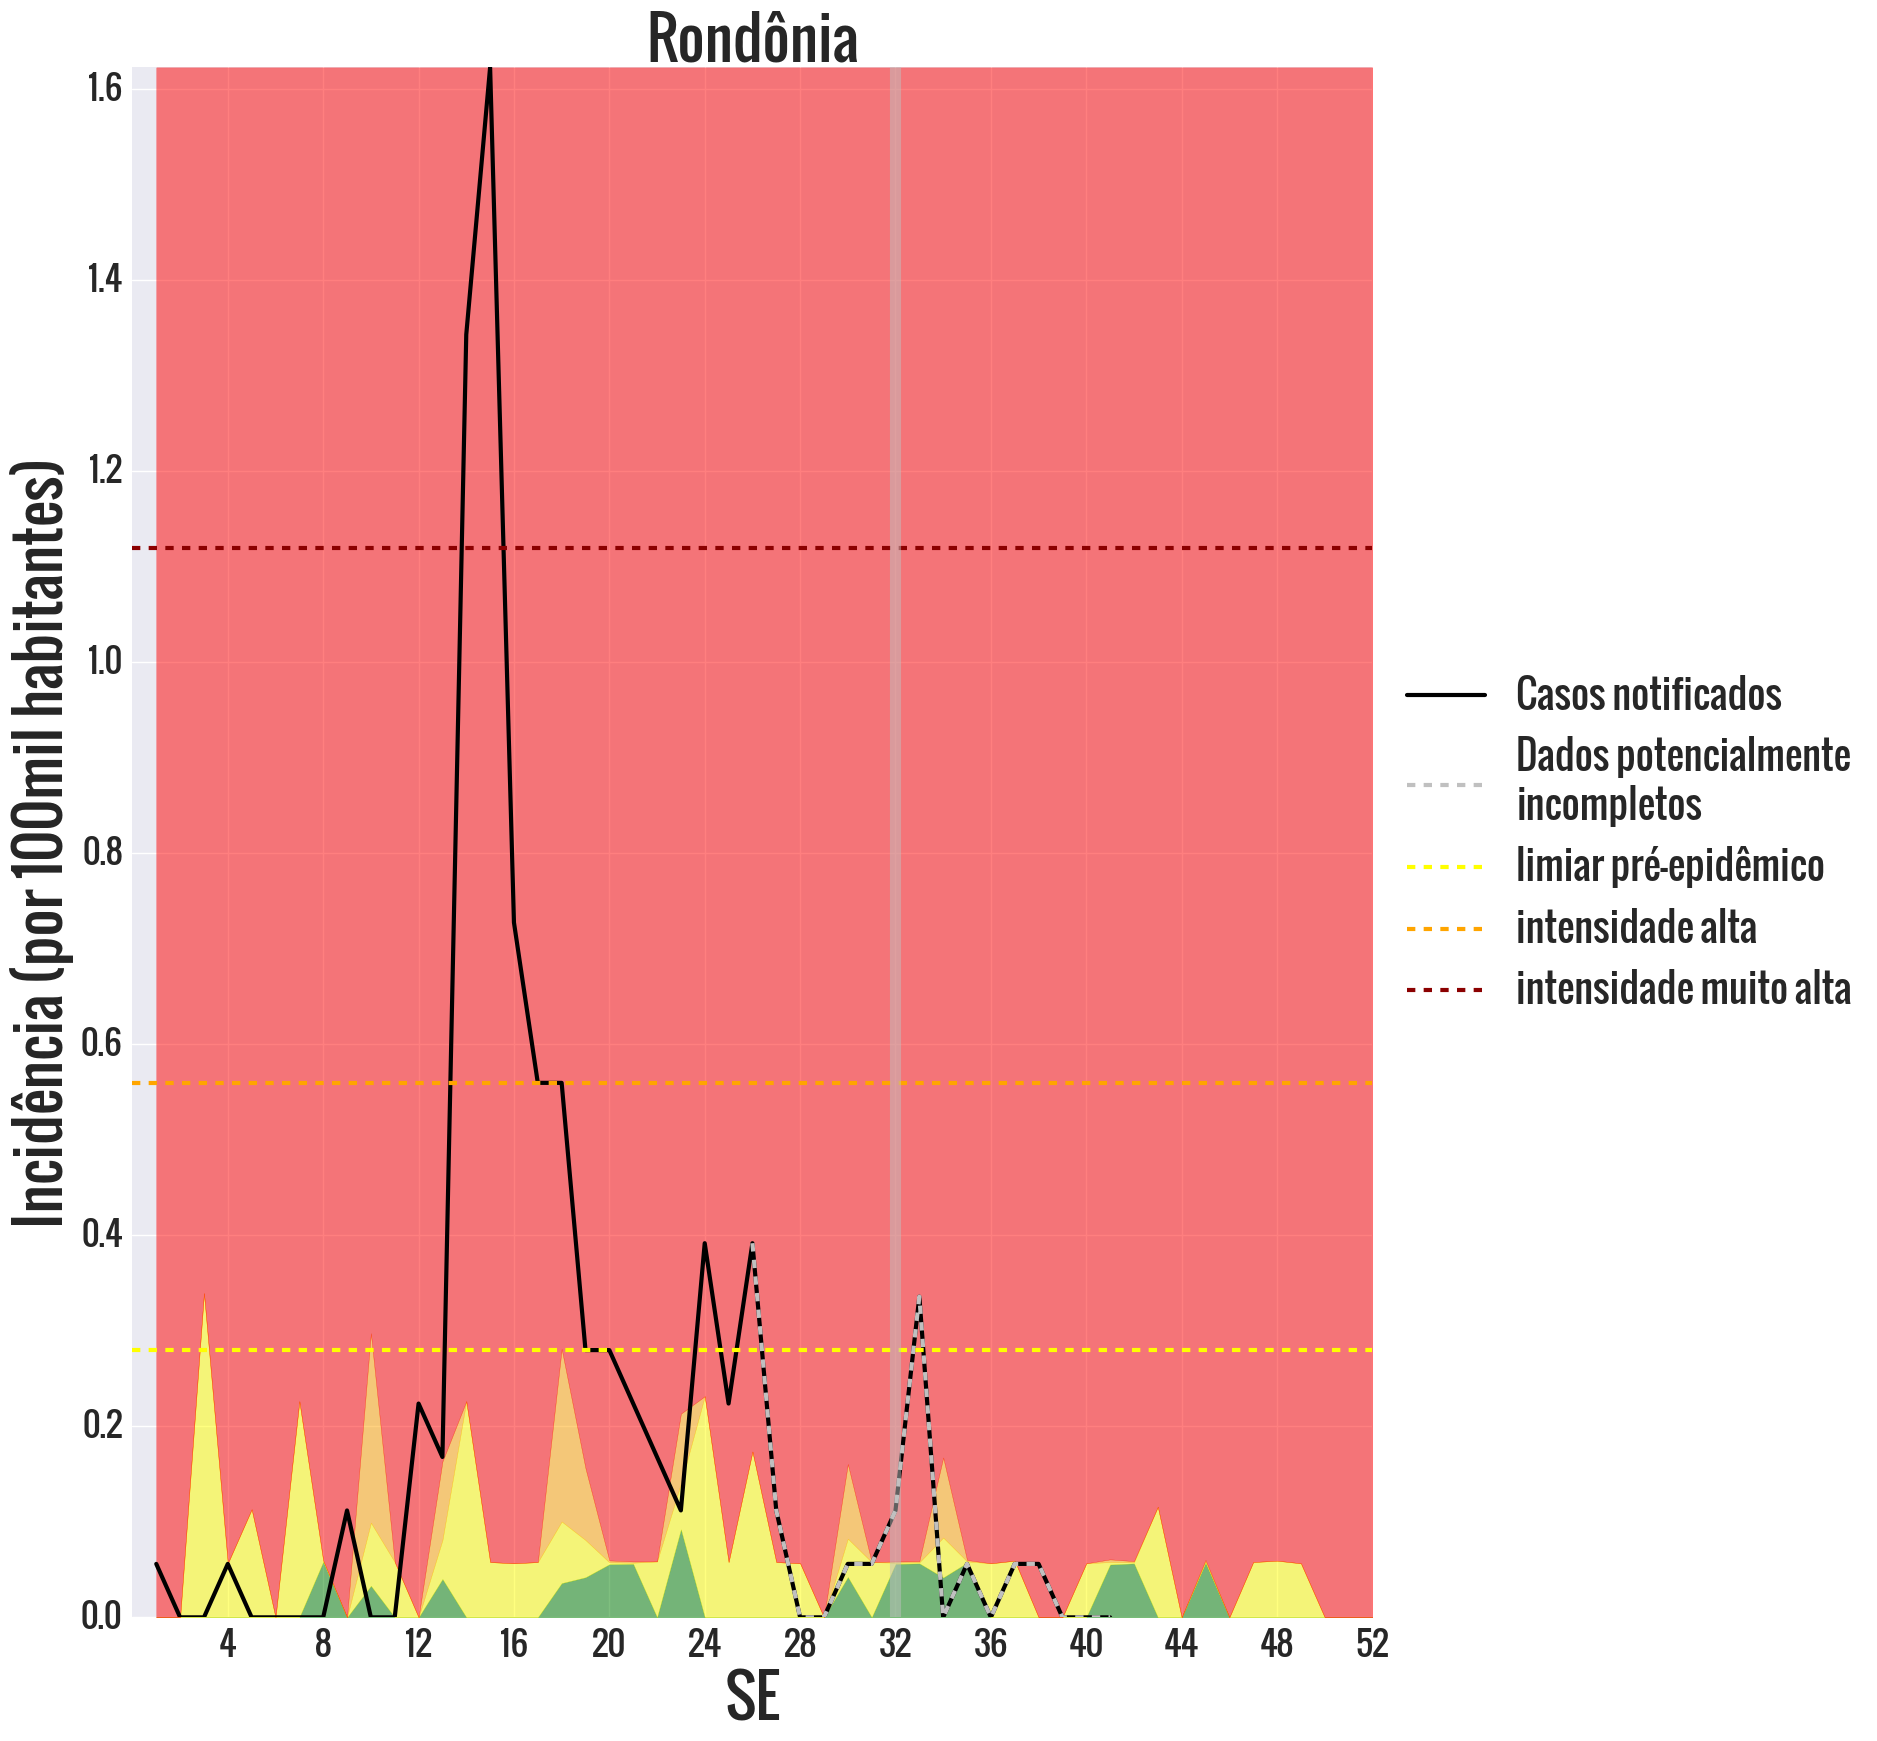

In [222]:
season = 2016
uf = 'Rondônia'
week = 32
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dfthres=dfthres_tmp, dftyp=dftyp_tmp)

# Obtaining the most probable activity level at selected week

In [227]:
season = 2016
uf = 'Rio Grande do Sul'
week = 41
df_tmp_week_level = df.loc[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season) & (df['epiweek'] == week),
                       level_dict.keys()]
df_tmp_week_level = df_tmp_week_level.unstack()
df_tmp_week_level.sort_values(ascending=False, inplace=True)
activity_level = df_tmp_week_level.index[0][0]
activity_level_prob = float(df_tmp_week_level[activity_level])
print(level_dict[activity_level], '{:.1f}%'.format(100*activity_level_prob))

Epidêmica 99.6%
